# 1. Scikit-learn Основы

## Основной рабочий цикл

1. Подготовка данных: **X**(признаки) и **Y**(целевая переменная)
2. Разделение на train/test\
from sklearn.model_selection import train_test_split\
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\
3. Создание модели:\
from sklearn.linear_model import LinearRegression\
model = LinearRegression()\
4. Обучение:\
model.fit(X_train, y_train)\
5. Предсказание:\
y_pred = model.predict(X_test)\
6. Оценка (MSE, $R^{2}$):\
from sklearn.metrics import mean_squared_error, r2_score\
mse = mean_squared_error(y_test, y_pred)\
r2 = r2_score(y_test, y_pred)\

## Пример из документации

In [9]:
from sklearn import datasets, linear_model
import numpy as np

#Загрузка данных
X, y = datasets.load_diabetes(return_X_y=True)
#Берем только одну особенность
X = X[:, np.newaxis, 2]

X_train, X_test = X[:-20], X[-20:]
y_train, y_test = y[:-20], y[-20:]

In [10]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

print("Coef:", model.coef_, "Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

Coef: [938.23786125] Intercept: 152.91886182616113
MSE: 2548.07239872597
R2: 0.47257544798227147


## Практическое задание
1. Сгенерировать синтетические данные, обучить модель, вычислить MSE, $R^{2}$.
2. Построить график точки (X,y) и линию предсказаний.
3. Изменить шум: попробовать $*2$ или $*0.5$, рассмотреть влияние на показатели
4. Разделить данные на train?test, повторить обучение и оценку

In [13]:
#Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
#Генерация данных
np.random.seed(42)
X = 10 * np.random.rand(100,1)
#Линейная зависимость с коэффициентами k=2, b=3 и шум с коэффициентом 1
y = 2 * X.squeeze() + 3 + np.random.randn(100) * 1

In [22]:
#Создаем модель и тренируем на всей выборке
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

In [24]:
print("Coef:", model.coef_[0], "Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y, y_pred), "R2:", r2_score(y, y_pred))

Coef: 1.9540226772876967 Intercept: 3.215096157546748
MSE: 0.8065845639670531 R2: 0.9764567983510799


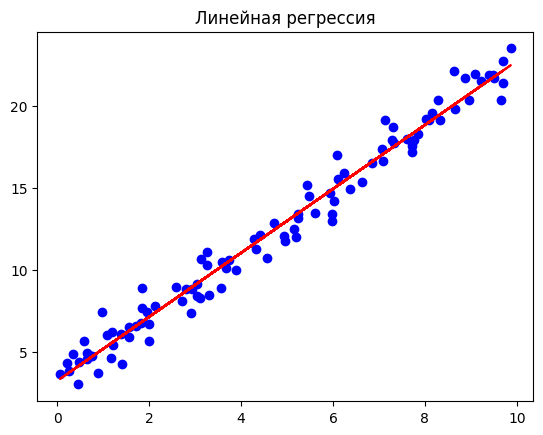

In [27]:
%matplotlib inline
#Строим графики
plt.scatter(X,y, color="blue")
plt.plot(X, y_pred, color="red")
plt.title("Линейная регрессия")
plt.show()

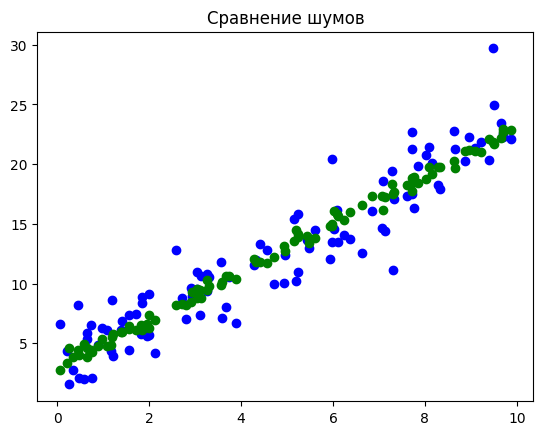

In [28]:
#Изменим шум
y_big = 2 * X.squeeze() + 3 + np.random.randn(100) * 2
y_small = 2 * X.squeeze() + 3 + np.random.randn(100) * 0.5
plt.scatter(X, y_big, color = 'blue')
plt.scatter(X, y_small, color = 'green')
plt.title('Сравнение шумов')
plt.show()

In [29]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [56]:
#Разделяем выборки для обоих моделей на обучающую и тренировочную
X_big_train, X_big_test, y_big_train, y_big_test = train_test_split(X, y_big, test_size=0.3, random_state=42)
X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(X, y_small, test_size=0.3, random_state=42)

In [49]:
model.fit(X_big_train, y_big_train)
y_big_pred = model.predict(X_big_test)

In [51]:
print("Coef big:", model.coef_[0], "Intercept big:", model.intercept_)
print("MSE:", mean_squared_error(y_big_test, y_big_pred), "R2:", r2_score(y_big_test, y_big_pred))

Coef big: 2.023193699768904 Intercept big: 2.4828246367232634
MSE: 7.2196402073386645 R2: 0.8493787065969334


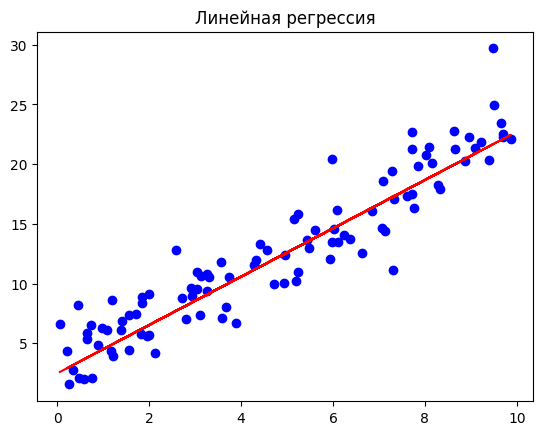

In [52]:
plt.scatter(X, y_big, color="blue")
plt.plot(X_big_test, y_big_pred, color="red")
plt.title("Линейная регрессия")
plt.show()

In [53]:
model.fit(X_small_train, y_small_train)
y_small_pred = model.predict(X_small_test)

In [54]:
print("Coef small:", model.coef_[0], "Intercept small:", model.intercept_)
print("MSE:", mean_squared_error(y_small_test, y_small_pred), "R2:", r2_score(y_small_test, y_small_pred))

Coef small: 2.008460021164663 Intercept small: 3.0274945856222377
MSE: 0.13816291218096202 R2: 0.9969340076616944


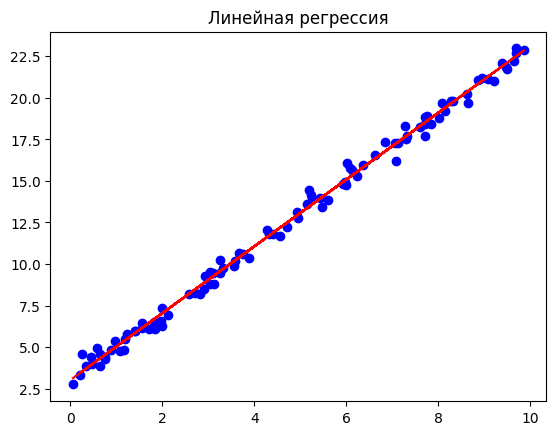

In [55]:
plt.scatter(X, y_small, color="blue")
plt.plot(X_small_test, y_small_pred, color="red")
plt.title("Линейная регрессия")
plt.show()